## Analysis of Healthcare Facilities and COVID-19 Data

This is to provide a preliminary analysis of healthcare facilities and their association with COVID-19 data. The analysis looked into key aspects such as the number of COVID-19 cases, COVID-19 deaths, mortality rates, and the distribution of healthcare facilities across different states. The data spans from 2020 to 2023, allowing for an examination of trends and patterns over time.

Find the dataset from [here](https://data.cms.gov/covid-19/covid-19-nursing-home-data). Find the data dictionary [here](chrome-extension://mhnlakgilnojmhinhkckjpncpbhabphi/pages/pdf/web/viewer.html?file=https%3A%2F%2Fdata.cms.gov%2Fsites%2Fdefault%2Ffiles%2F2022-11%2FCOVID-19%2520Nursing%2520Home%2520Data%2520Dictionary%252011.20.2022.pdf)

In [ ]:
import os
import zipfile

import pandas as pd

## Below codes works for the below scenario: 
# there are multiple zipped files in covid_raw folder, unzip the files and store csv files in a new csv_files folder,
# create a pandas df to store the combined data from the unzipped csv files, and save the combined data into a new csv file.

# Create a new folder to store the csv files
if not os.path.exists('csv_files'):
    os.makedirs('csv_files')

# Unzip the 12 zip files (plug in the folder path to the below)
for filename in os.listdir('covid_raw'):
    if filename.endswith('.zip'):
        with zipfile.ZipFile('covid_raw/' + filename, 'r') as zip_ref:
            zip_ref.extractall('csv_files')

# Combine the data from the 12 csv files into a pandas dataframe
data = []
for filename in os.listdir('csv_files'):
    if filename.endswith('.csv'):
        with open('csv_files/' + filename, 'r') as f:
            data.append(pd.read_csv(f))

df = pd.concat(data)

# remove duplicates from df
df = df.drop_duplicates()

# Save the dataframe to a csv file
df.to_csv('covid_combined.csv', index=False)

In [3]:
print(df.shape)

df.head().T

(2508292, 39)


,0,1,2,3,4
Week Ending,2020-05-24,2020-05-31,2020-06-07,2020-06-21,2020-06-28
Federal Provider Number,125063.0,125063.0,125063.0,125063.0,125063.0
Provider Name,15 CRAIGSIDE,15 CRAIGSIDE,15 CRAIGSIDE,15 CRAIGSIDE,15 CRAIGSIDE
Provider Address,15 CRAIGSIDE PLACE,15 CRAIGSIDE PLACE,15 CRAIGSIDE PLACE,15 CRAIGSIDE PLACE,15 CRAIGSIDE PLACE
Provider City,HONOLULU,HONOLULU,HONOLULU,HONOLULU,HONOLULU
Provider State,HI,HI,HI,HI,HI
Provider Zip Code,96817,96817,96817,96817,96817
Provider Phone Number,8085237000,8085237000,8085237000,8085237000,8085237000
County,Honolulu,Honolulu,Honolulu,Honolulu,Honolulu
Submitted Data,Y,Y,Y,Y,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2508292 entries, 0 to 2508291
Data columns (total 39 columns):
 #   Column                                                                                                                                                       Dtype  
---  ------                                                                                                                                                       -----  
 0   Week Ending                                                                                                                                                  object 
 1   Federal Provider Number                                                                                                                                      object 
 2   Provider Name                                                                                                                                                object 
 3   Provider Address                

In [5]:
df.isnull().sum()

Week Ending                                                                                                                                                          0
Federal Provider Number                                                                                                                                              0
Provider Name                                                                                                                                                        0
Provider Address                                                                                                                                                     0
Provider City                                                                                                                                                        0
Provider State                                                                                                                                                       

In [6]:
df['Week Ending'] = pd.to_datetime(df['Week Ending'])

### Analysis

#### 1. Determine the total number of COVID-19 cases, deaths, and recoveries for each state.

In [11]:
df['Weekly Recoveries'] = df['Residents Weekly Confirmed COVID-19'] - df['Residents Weekly COVID-19 Deaths']

df.groupby('Provider State')\
.agg( total_cases = ('Residents Weekly Confirmed COVID-19','sum'), 
     total_covid_deaths = ('Residents Weekly COVID-19 Deaths', 'sum'),
     total_recoveries = ('Weekly Recoveries', 'sum'))\
.sort_values('total_cases',ascending = False)

,total_cases,total_covid_deaths,total_recoveries
Provider State,,,
CA,146015.0,10911.0,135104.0
TX,129331.0,11322.0,118009.0
NY,113765.0,11084.0,102681.0
PA,110594.0,12532.0,98062.0
OH,102953.0,10180.0,92773.0
FL,95062.0,6347.0,88715.0
IL,89686.0,8711.0,80975.0
NC,56125.0,4900.0,51225.0
MO,56078.0,4760.0,51318.0


<Axes: xlabel='Provider State'>

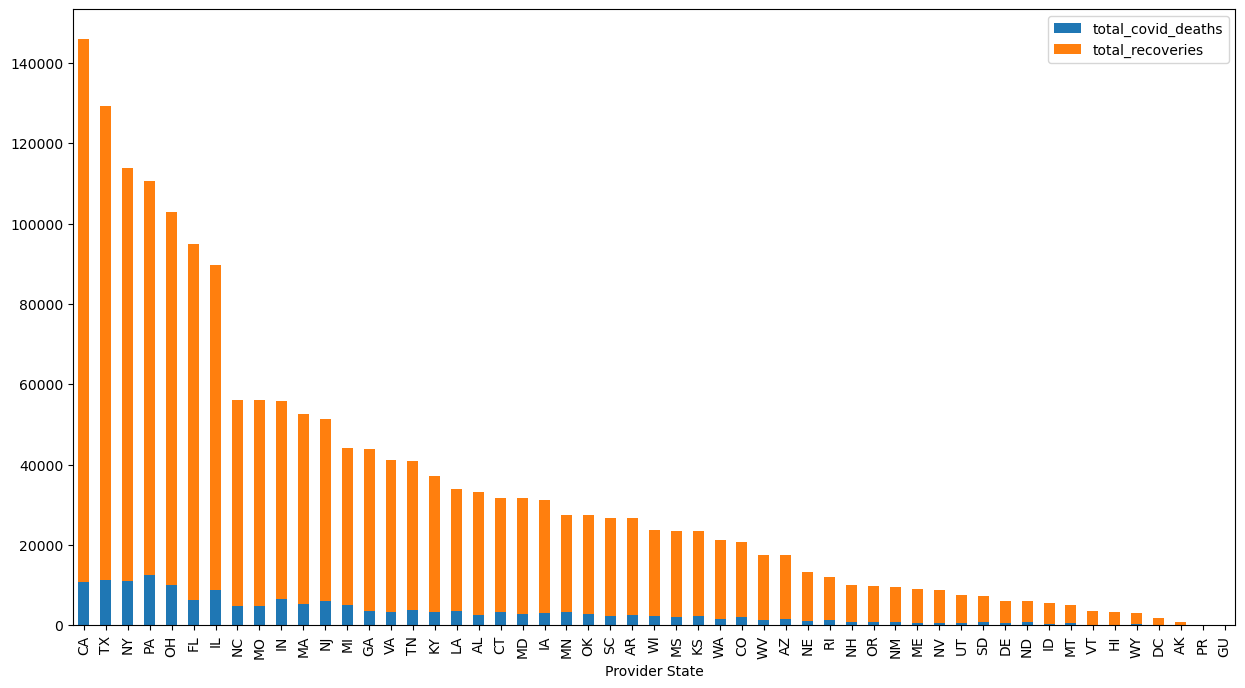

In [12]:
df.groupby('Provider State')\
.agg( total_cases = ('Residents Weekly Confirmed COVID-19','sum'), 
     total_covid_deaths = ('Residents Weekly COVID-19 Deaths', 'sum'),
     total_recoveries = ('Weekly Recoveries', 'sum'))\
.sort_values('total_cases',ascending = False)\
[['total_covid_deaths','total_recoveries']].plot(kind = 'bar', stacked = True, figsize = (15,8))

The above analysis provides a summary of COVID-19 cases, deaths, and recoveries by state. 

Here are some notable observations:

- The state with the highest number of total cases is California, followed by Texas and New York.
- Pennsylvania has the highest number of total COVID-19 deaths, followed by Texas, New York, and California.

These statistics provide insights into the impact of COVID-19 across different states, highlighting the varying levels of cases, deaths, and recoveries. It underscores the importance of implementing effective measures to prevent the spread of the virus and ensure the well-being of individuals in each state.

#### 2. Which healthcare facilities had the highest average number of weekly COVID-19 cases in 2020? Display the top 10 facilities.

In [13]:
df.loc[df['Week Ending'].dt.year == 2020,:]\
.groupby('Provider Name')['Residents Weekly Confirmed COVID-19'].mean().sort_values(ascending=False).head(10)

Provider Name
GRACEWAY AT COUNTRYSIDE                           19.684211
SPRING CREEK REHABILITATION AND NURSING CENTER    11.593750
BRIGHTON REHABILITATION AND WELLNESS CENTER       11.093750
NEW VISTA NURSING & REHABILITATION CTR            11.068966
CEDARBROOK SENIOR CARE AND REHABILITATION         10.531250
LEE COUNTY CARE AND REHABILITATION CENTER         10.166667
COUNTRYSIDE REHAB AND HEALTHCARE CENTER           10.047619
CORNER VIEW NURSING AND REHABILITATION CENTER     10.000000
GOLDEN CROSS HEALTH CARE                          10.000000
PEARL RIVER CO NURSING HOME                        9.500000
Name: Residents Weekly Confirmed COVID-19, dtype: float64

<Axes: ylabel='Provider Name'>

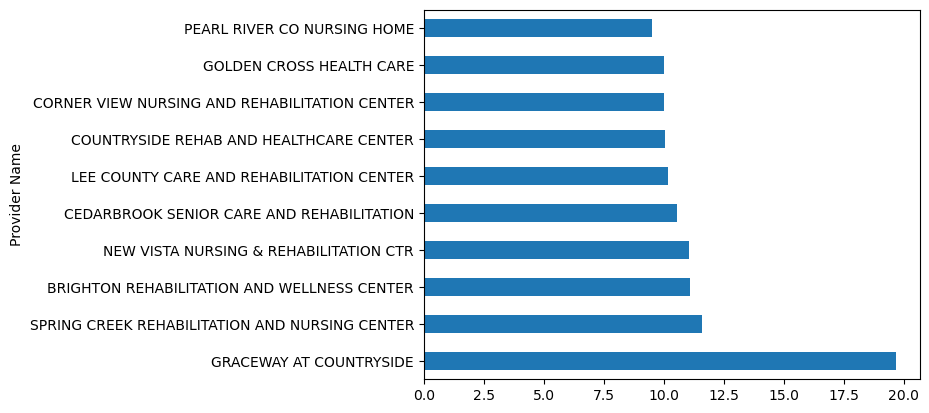

In [14]:
df.loc[df['Week Ending'].dt.year == 2020,:]\
.groupby('Provider Name')['Residents Weekly Confirmed COVID-19'].mean().sort_values(ascending=False).head(10).plot(kind = 'barh')

#### 3. Find the top 5 states with the highest mortality rate (deaths per COVID-19 case) in 2022.

In [15]:
metrics = df[df['Week Ending'].dt.year == 2022]\
.groupby('Provider State')\
.agg(total_cases = ('Residents Weekly Confirmed COVID-19','sum'), total_covid_deaths = ('Residents Weekly COVID-19 Deaths','sum'))\
.assign(mortality_rate = lambda x: (x.total_covid_deaths/x.total_cases)*100.0)\
.sort_values('mortality_rate', ascending = False).head()

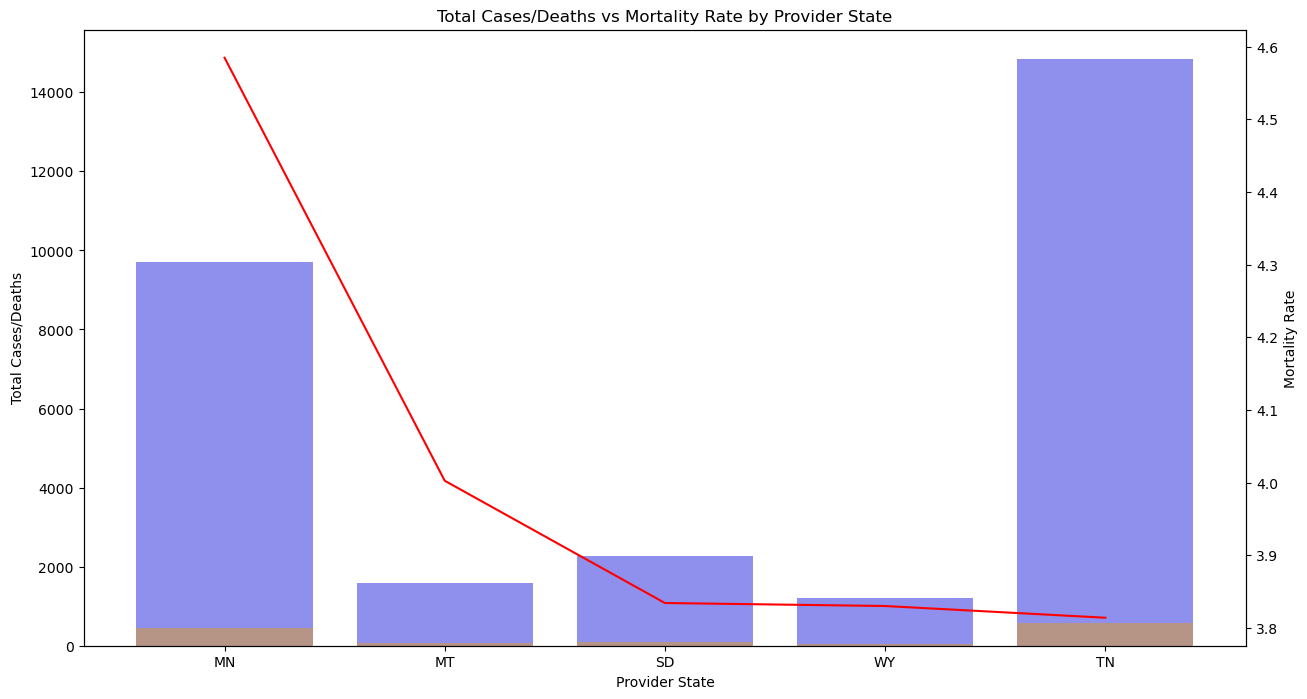

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(15,8))
ax2 = ax1.twinx()

# Plot total_cases and total_deaths as bars
sns.barplot(x=metrics.index, y='total_cases', data=metrics, ax=ax1, color='blue', alpha=0.5)
sns.barplot(x=metrics.index, y='total_covid_deaths', data=metrics, ax=ax1, color='orange', alpha=0.5)

# Plot mortality_rate as a line
sns.lineplot(x=metrics.index, y='mortality_rate', data=metrics, ax=ax2, color='red')

# Set axis labels and titles
ax1.set_xlabel('Provider State')
ax1.set_ylabel('Total Cases/Deaths')
ax2.set_ylabel('Mortality Rate')
ax1.set_title('Total Cases/Deaths vs Mortality Rate by Provider State')

plt.show()

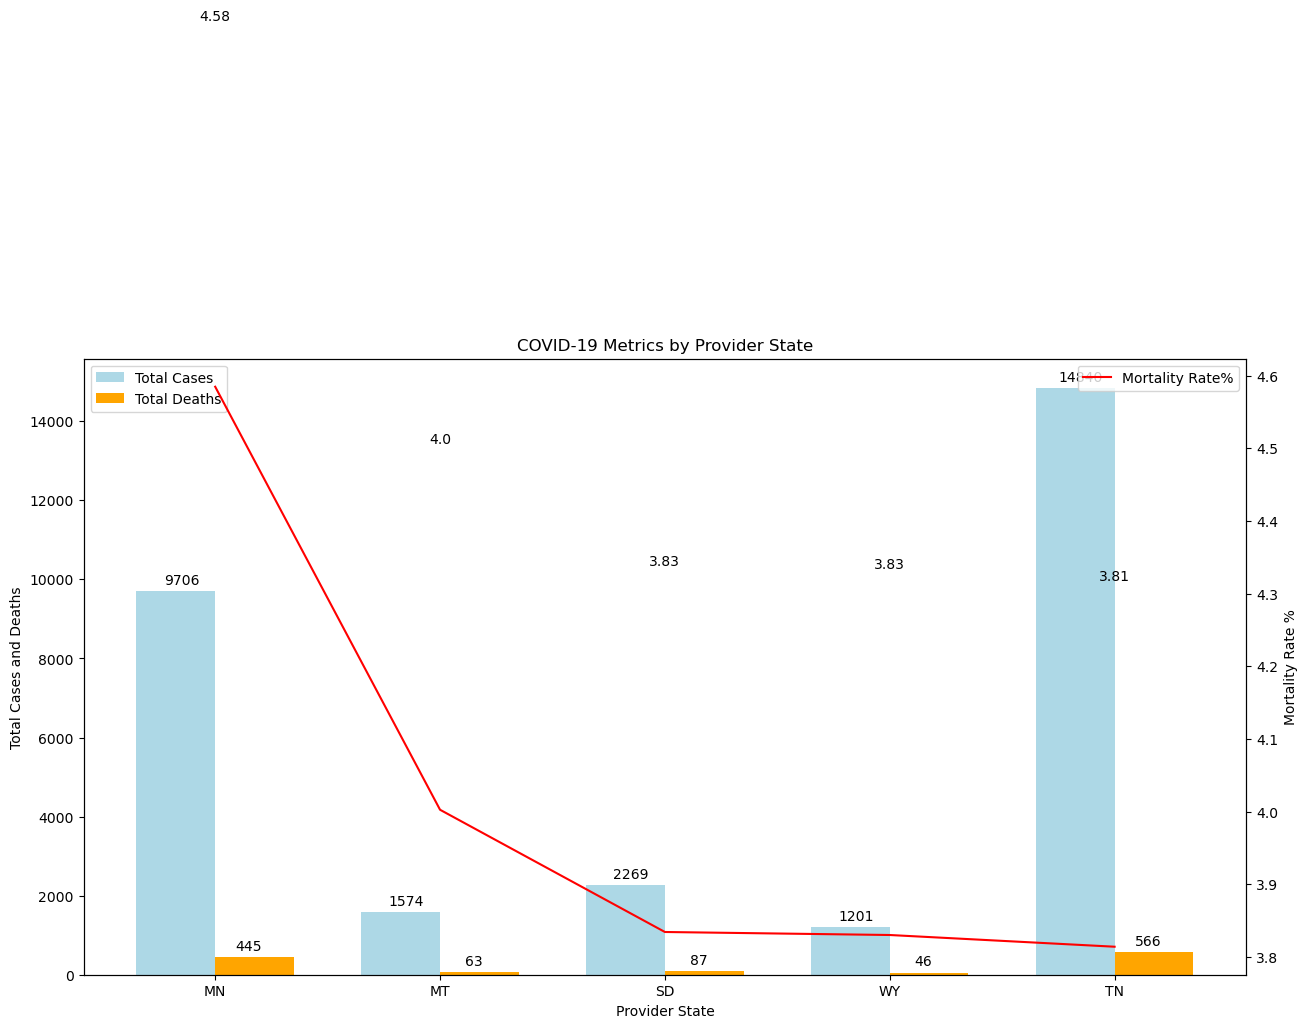

In [17]:
import matplotlib.pyplot as plt

# Create the dual-axis chart
fig, ax1 = plt.subplots(figsize=(15,8) )

# Plot total_cases as a bar chart
width = 0.35
index = metrics.reset_index().index
p1 = ax1.bar(index - width / 2, metrics["total_cases"], width, color="lightblue", label="Total Cases")

# Plot total_deaths as a bar chart with offset
p2 = ax1.bar(index + width / 2, metrics["total_covid_deaths"], width, color="orange", label="Total Deaths")

# Plot mortality_rate as a line
ax2 = ax1.twinx()
ax2.plot(metrics.reset_index()["Provider State"], metrics["mortality_rate"], color="red", label="Mortality Rate%")

# Set labels and title
ax1.set_xlabel("Provider State")
ax1.set_ylabel("Total Cases and Deaths")
ax2.set_ylabel("Mortality Rate %")
plt.title("COVID-19 Metrics by Provider State")

# Add number labels for Total Cases and Total Deaths
for i, v in enumerate(metrics["total_cases"]):
    ax1.text(i - 0.15, v + 100, str(int(v)), ha='center', va='bottom', fontsize=10)

for i, v in enumerate(metrics["total_covid_deaths"]):
    ax1.text(i + 0.15, v + 100, str(int(v)), ha='center', va='bottom', fontsize=10)
    
for i, v in enumerate(metrics["mortality_rate"]):
    ax2.text(i, v + 0.5, str(round(v, 2)), ha='center', va='bottom', fontsize=10)
    
# Add a legend with custom position
ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')

# Show the chart
plt.show()

Overall, the COVID mortality rate in 2022 is not high. 
Minnesota (MN) has the highest mortality rate at 4.58%, followed by MT with 4.0%.
SD, WY and TN also have relatively high mortality rates at 3.83%, 3.83% and 3.81%, respectively.
These statistics highlight the severity of COVID-19's impact on certain states, with higher mortality rates indicating a higher proportion of deaths relative to the total number of cases.

#### 4. Identify the healthcare facilities that experienced a significant increase in COVID-19 cases from 2020 to 2021 (more than a 50% increase).

In [18]:
case2020 = df[df['Week Ending'].dt.year == 2020].groupby('Provider Name')\
          .agg(total_cases_2020 = ('Residents Weekly Confirmed COVID-19','sum'))


case2021 = df[df['Week Ending'].dt.year == 2021].groupby('Provider Name')\
          .agg(total_cases_2021 = ('Residents Weekly Confirmed COVID-19','sum'))


In [19]:
case2020.join(case2021).query("total_cases_2020 > 0")\
.assign(change_percent_20to21 = lambda x: (x.total_cases_2021 - x.total_cases_2020)/x.total_cases_2020 * 100.0 )\
.query("change_percent_20to21 > 50")\
.sort_values('change_percent_20to21', ascending = False).head(10)        

,total_cases_2020,total_cases_2021,change_percent_20to21
Provider Name,,,
CHAUTAUQUA NURSING AND REHABILITATION CENTER,1.0,113.0,11200.0
DELMAR CENTER FOR REHABILITATION AND NURSING,1.0,104.0,10300.0
CARTHAGE CENTER FOR REHABILITATION AND NURSING,1.0,99.0,9800.0
CHESHIRE REGIONAL REHAB CENTER,1.0,96.0,9500.0
CITYVIEW NURSING AND REHABILITATION CENTER,1.0,91.0,9000.0
MCCORMICK POST ACUTE,1.0,89.0,8800.0
MEDILODGE OF OKEMOS,1.0,88.0,8700.0
MEDILODGE OF HOWELL,1.0,87.0,8600.0
PARK BEND HEALTH CENTER,1.0,86.0,8500.0


Above are the top 10 facilities with the highest percentage increase.

#### 5. What is the total number of COVID-19 cases, deaths, and recoveries recorded in the datasets?

In [20]:
df['total_recoveries'] = df['Residents Weekly Confirmed COVID-19'] - df['Residents Weekly COVID-19 Deaths']

In [21]:
df[['Residents Weekly Confirmed COVID-19', 'Residents Weekly COVID-19 Deaths', 'total_recoveries']].sum()\
.rename(index={'Residents Weekly Confirmed COVID-19': 'total_cases', 
               'Residents Weekly COVID-19 Deaths': 'total_deaths'})

total_cases         1808640.0
total_deaths         169306.0
total_recoveries    1639334.0
dtype: float64

<Axes: >

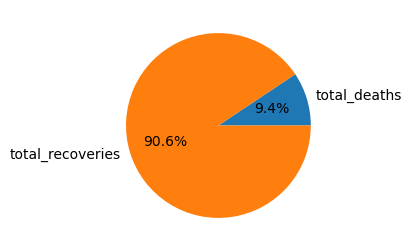

In [22]:
df[['Residents Weekly COVID-19 Deaths', 'total_recoveries']].sum()\
.rename(index={'Residents Weekly COVID-19 Deaths': 'total_deaths'}).plot(kind = 'pie', autopct='%1.1f%%', figsize = (3,3))

#### 6. Calculate the mortality rate (deaths per COVID-19 case) for each healthcare facility.

In [23]:
import numpy as np

df.groupby('Provider Name')\
.agg(total_cases = ('Residents Weekly Confirmed COVID-19','sum'), total_deaths = ('Residents Weekly COVID-19 Deaths','sum'))\
.assign(mortality_rate = lambda x: (x.total_deaths/x.total_cases)*100.0)\
.replace([np.inf, -np.inf], np.nan)\
.sort_values('mortality_rate', ascending = False).head(15)

,total_cases,total_deaths,mortality_rate
Provider Name,,,
PARK MERRITT CARE CENTER,1.0,13.0,1300.000000
INTERLUDE RESTORATIVE SUITES,5.0,39.0,780.000000
FOCUSED CARE AT BAYTOWN,8.0,61.0,762.500000
TIGARD REHABILITATION AND CARE,35.0,89.0,254.285714
THE LIVING CENTER,14.0,33.0,235.714286
THE MEDICAL RESORT AT WOODLANDS,4.0,8.0,200.000000
BIG CREEK NURSING AND REHABILITATION COMMUNITY,3.0,6.0,200.000000
ABRAMSON SENIOR CARE AT LANKENAU MEDICAL CENTER,6.0,10.0,166.666667
WESTPARK A WATERS COMMUNITY,41.0,67.0,163.414634


#### 7.Are there any significant differences in COVID-19 outcomes based on the type of healthcare facility (e.g., hospital, nursing home)?

In [24]:
df['facility_type'] = np.where( df['Provider Name'].str.contains('HOSPITAL'), 'Hospital',
                               np.where(df['Provider Name'].str.contains('NURSING HOME'), 'Nursing_Home',
                                       np.where(df['Provider Name'].str.contains('HEALTH CENTER'),'Health_Center',
                                       np.where(df['Provider Name'].str.contains('HEALTHCARE AND REHAB CENTER'),'Healthcare_Rehab_Center',
                                       np.where(df['Provider Name'].str.contains('CARE CENTER'),'Care_Center', 'Other'
                                               )        
                                               ),
                                       )
                                )
                              )

In [25]:
metricsByFT= df.groupby('facility_type')\
.agg(total_cases = ('Residents Weekly Confirmed COVID-19','sum'), total_deaths = ('Residents Weekly COVID-19 Deaths','sum'))\
.assign(mortality_rate = lambda x: (x.total_deaths/x.total_cases)*100.0)\
.replace([np.inf, -np.inf], np.nan)\
.sort_values('total_cases', ascending = False)

metricsByFT

,total_cases,total_deaths,mortality_rate
facility_type,,,
Other,1432152.0,134635.0,9.400888
Care_Center,288523.0,26146.0,9.062016
Nursing_Home,45003.0,4588.0,10.194876
Health_Center,24938.0,2248.0,9.014356
Hospital,16299.0,1532.0,9.399350
Healthcare_Rehab_Center,1725.0,157.0,9.101449


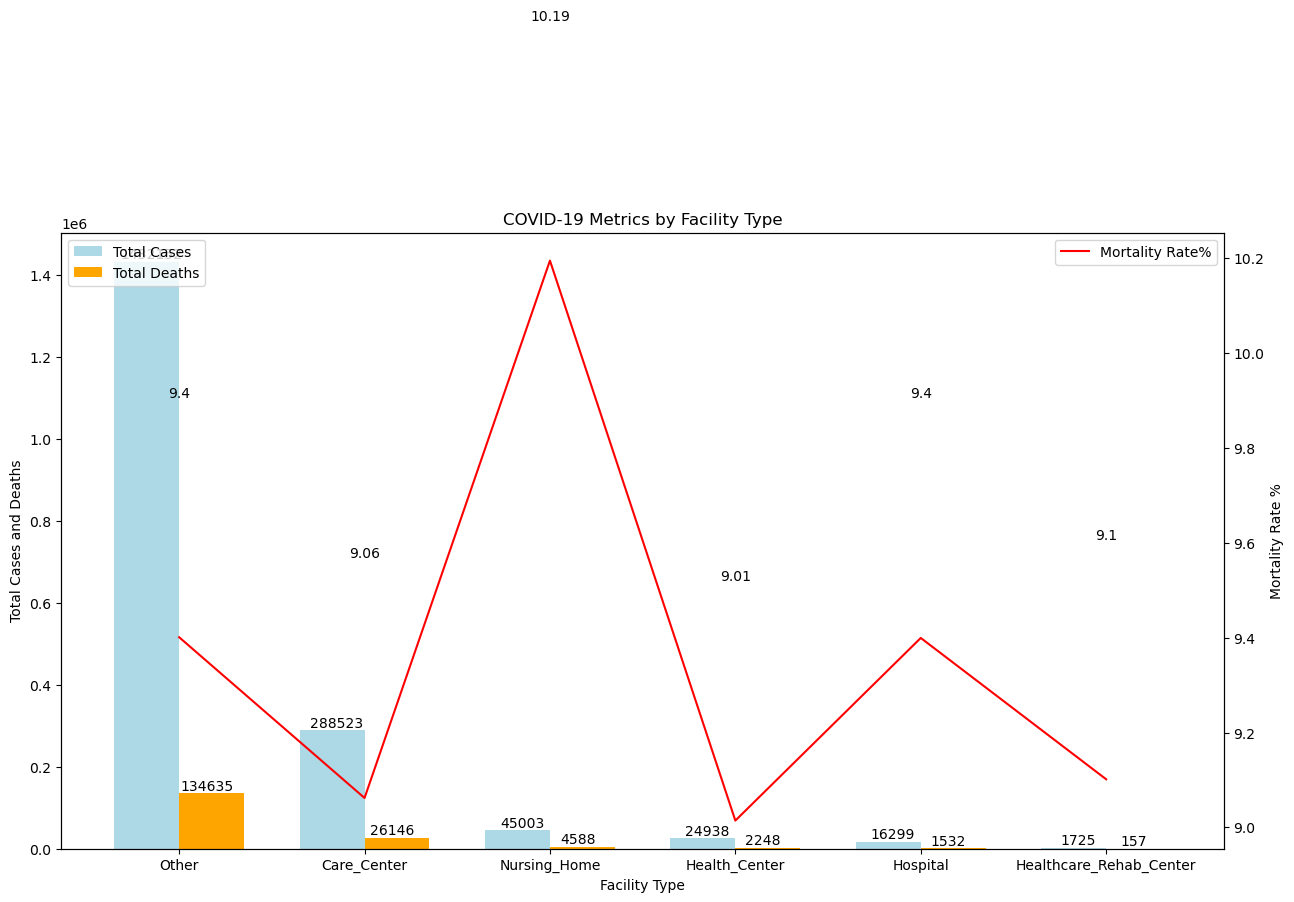

In [26]:
# Create the dual-axis chart
fig, ax1 = plt.subplots(figsize=(15,8) )

# Plot total_cases as a bar chart
width = 0.35
index = metricsByFT.reset_index().index
p1 = ax1.bar(index - width / 2, metricsByFT["total_cases"], width, color="lightblue", label="Total Cases")

# Plot total_deaths as a bar chart with offset
p2 = ax1.bar(index + width / 2, metricsByFT["total_deaths"], width, color="orange", label="Total Deaths")

# Plot mortality_rate as a line
ax2 = ax1.twinx()
ax2.plot(metricsByFT.index, metricsByFT["mortality_rate"], color="red", label="Mortality Rate%")

# Set labels and title
ax1.set_xlabel("Facility Type")
ax1.set_ylabel("Total Cases and Deaths")
ax2.set_ylabel("Mortality Rate %")
plt.title("COVID-19 Metrics by Facility Type")

# Add number labels for Total Cases and Total Deaths
for i, v in enumerate(metricsByFT["total_cases"]):
    ax1.text(i - 0.15, v + 100, str(int(v)), ha='center', va='bottom', fontsize=10)

for i, v in enumerate(metricsByFT["total_deaths"]):
    ax1.text(i + 0.15, v + 100, str(int(v)), ha='center', va='bottom', fontsize=10)
    
for i, v in enumerate(metricsByFT["mortality_rate"]):
    ax2.text(i, v + 0.5, str(round(v, 2)), ha='center', va='bottom', fontsize=10)
    
# Add a legend with custom position
ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')

# Show the chart
plt.show()

#### 8.How has the number of COVID-19 cases evolved over time (monthly or quarterly)?

In [27]:
df['YearMonth'] = df['Week Ending'].dt.strftime('%Y-%m')

In [28]:
MonthTrend= df.groupby('YearMonth')\
.agg(total_cases = ('Residents Weekly Confirmed COVID-19','sum'), total_deaths = ('Residents Weekly COVID-19 Deaths','sum'))\
.assign(mortality_rate = lambda x: (x.total_deaths/x.total_cases)*100.0)\
.replace([np.inf, -np.inf], np.nan)

<Axes: xlabel='YearMonth'>

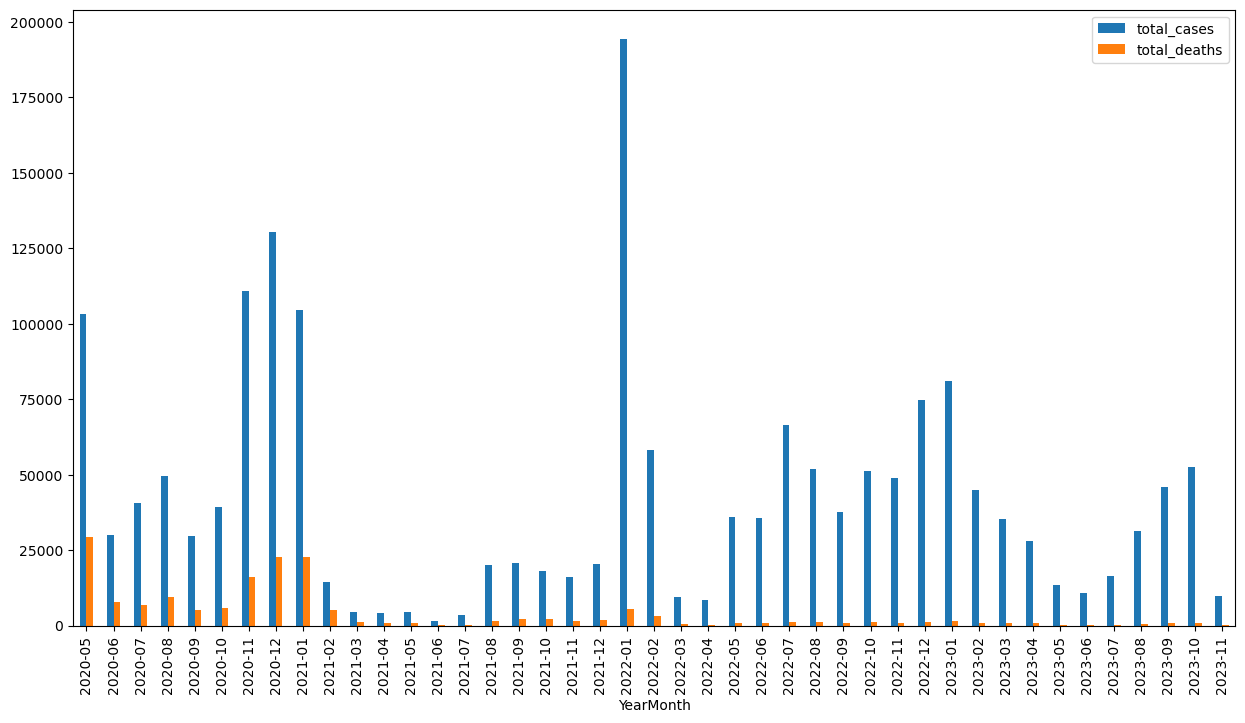

In [29]:
MonthTrend[['total_cases','total_deaths']].plot(kind = 'bar', figsize = (15,8))

<Axes: xlabel='YearMonth'>

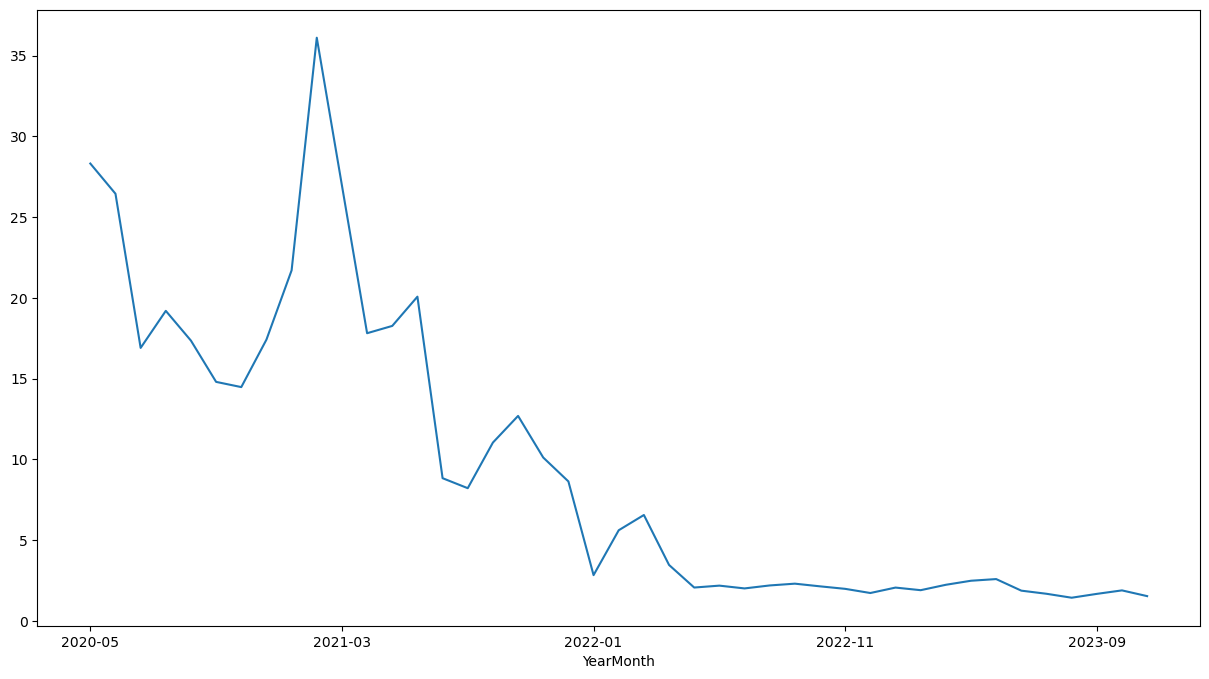

In [30]:
MonthTrend['mortality_rate'].plot(figsize = (15,8))

Overall the mortality rate has been consistently decreasing from May 2020 to October 2023, despite a peak around March 2021.

#### 9. What is the distribution of healthcare facilities by state?

<Axes: xlabel='Provider State'>

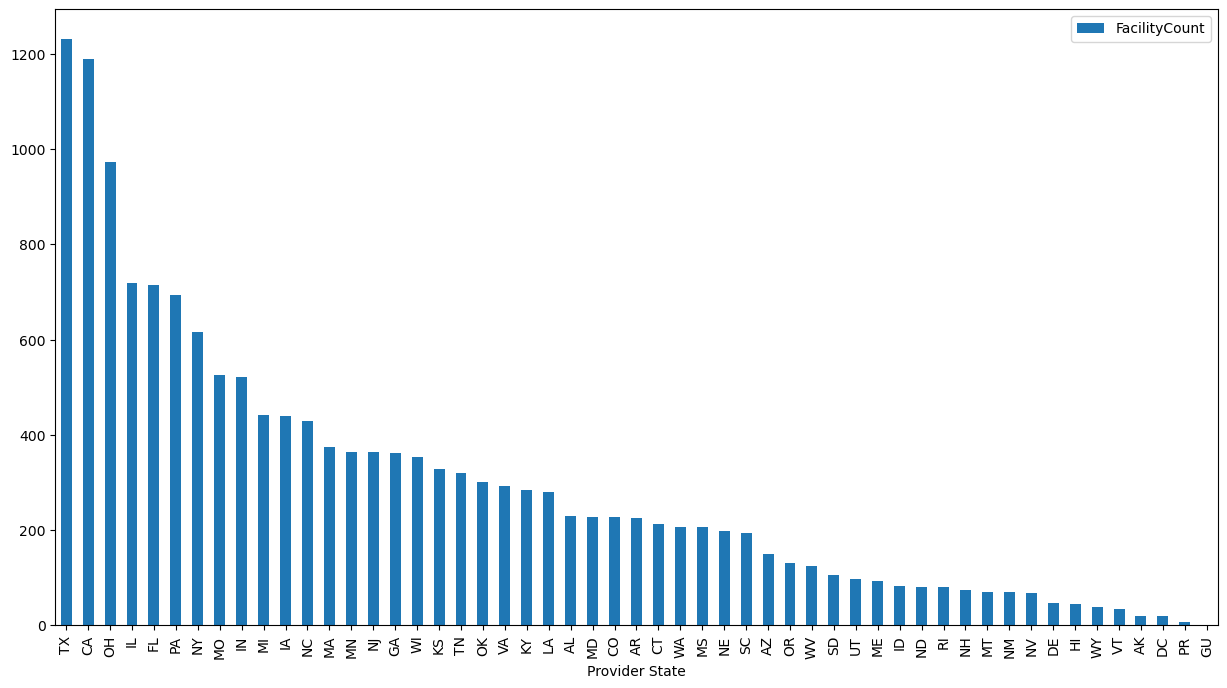

In [31]:
df.groupby('Provider State')\
.agg(FacilityCount = ('Provider Name','nunique')).sort_values('FacilityCount', ascending = False)\
.plot(kind = 'bar', figsize = (15,8))